In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# loading the dataset
data = pd.read_csv("/Users/shaozishan/Desktop/Data_Plot_BDCD/NERSC_outputs/caksvm_data_mnist_linear.csv")
data.head(6)

,filename,kernel,num_process,s,blksize,degree,max_iter,Gauss_para,LAMBDA,csr_setup_time,kernel_computation,allreduce_time,sample_time,csr_read_time,gradient_comp_time,alpha_update,memory_reset,major_time,runtime
0,mnist.scale,linear,512,64,1,5,640,1.0,1.0,0.911198,1.700000e-09,0.004897,6.910000e-08,6.000000e-08,0.000270,0.000006,0.000737,0.005910,4.693658
1,mnist.scale,linear,512,32,1,5,640,1.0,1.0,0.582521,4.100000e-09,0.004844,1.065000e-07,5.000000e-08,0.000280,0.000008,0.000709,0.005841,4.320888
2,mnist.scale,linear,512,16,1,5,640,1.0,1.0,0.473522,7.100000e-09,0.004674,1.629000e-07,7.000000e-08,0.000300,0.000009,0.000645,0.005629,4.075992
3,mnist.scale,linear,512,8,1,5,640,1.0,1.0,0.487639,1.650000e-08,0.004271,2.832000e-07,1.000000e-07,0.000351,0.000011,0.000638,0.005272,3.861801
4,mnist.scale,linear,512,4,1,5,640,1.0,1.0,0.371556,3.310000e-08,0.004156,5.131000e-07,8.000000e-08,0.000374,0.000016,0.000442,0.004988,3.564502
5,mnist.scale,linear,512,2,1,5,640,1.0,1.0,0.337904,8.590000e-08,0.004046,2.445000e-07,7.000000e-08,0.000271,0.000014,0.000366,0.004697,3.344268


# 原版代码


<class 'list'>


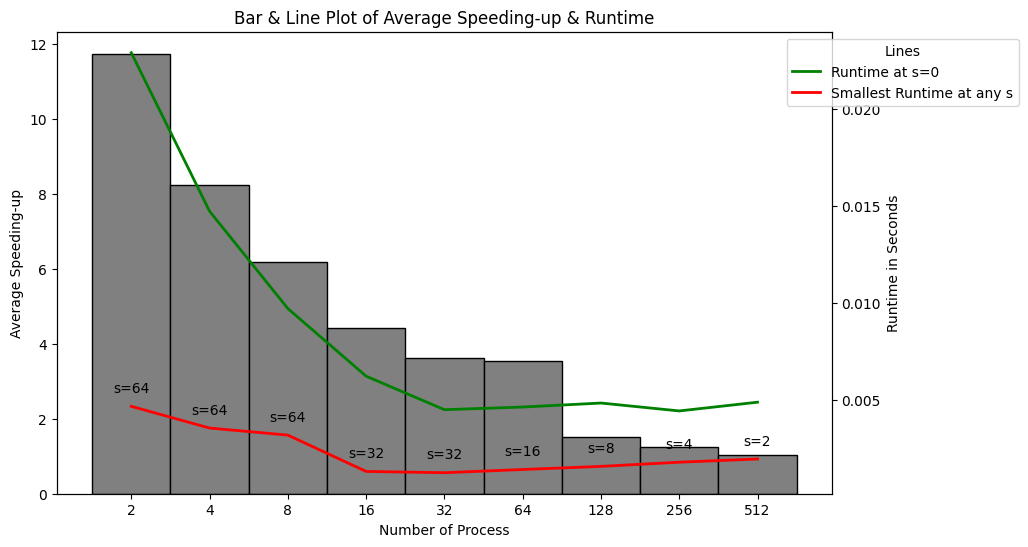

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe containing the mentioned columns
# Sample data:
# df = pd.DataFrame({
#     'blksize': [...],
#     's': [...],
#     'num_processes': [...],
#     'runtime': [...],
#     'kernel': [...],
#     'allreduce_time': [...]
# })

df = data

# Calculating the average speeding-up and smallest runtime
avg_speedup = []
runtime_s_0 = []
min_runtime_s = []

print(type(min_runtime_s))
'''
for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()
    # runtime_s_0.append(runtime_s_0_value)
    runtime_s_0 = np.concatenate(([runtime_s_0_value], runtime_s_0))
    min_runtime = subset_df['major_time'].min()
    min_runtime_s.append(min_runtime)
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.append(speedup)
'''

for num_process in df['num_process'].unique():
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].min()
    
    # Inserting at the beginning of the list to reverse the order
    runtime_s_0.insert(0, runtime_s_0_value)
    
    min_runtime = subset_df['major_time'].min()
    # min_runtime_s.insert(0, min_runtime) # Inserting here as well
    min_runtime_s.append(min_runtime)
    
    speedup = runtime_s_0_value / min_runtime
    avg_speedup.insert(0, speedup) # Inserting here as well




# ... (Same as above, including DataFrame and calculations)


# Calculating the 's' value corresponding to the smallest runtime

s_values_min_runtime = [df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s'].iloc[0]
                        for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s)]


reversed = []

for elts in s_values_min_runtime:
    reversed.insert(0,elts)
    

# Getting unique num_processes values
unique_num_processes = sorted(df['num_process'].unique())

# Plotting the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(range(len(unique_num_processes)), avg_speedup, color='gray', edgecolor='black', width=1)
ax1.set_xlabel('Number of Process')
ax1.set_ylabel('Average Speeding-up')
ax1.set_title('Bar & Line Plot of Average Speeding-up & Runtime')
plt.xticks(range(len(unique_num_processes)), unique_num_processes) # Setting x-axis ticks to unique values

# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime in Seconds')

# Line plots
line1, = ax2.plot(range(len(unique_num_processes)), runtime_s_0, 'g-', label='Runtime at s=0', linewidth=2)
line2, = ax2.plot(range(len(unique_num_processes)), min_runtime_s, 'r-', label='Smallest Runtime at any s', linewidth=2)

# Adding s-value annotations  # s_values_min_runtime
for i, y, s_value in zip(range(len(unique_num_processes)), min_runtime_s, reversed):
    plt.annotate(f's={s_value}', (i, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend
ax2.legend(handles=[line1, line2], loc='upper right', title='Lines', bbox_to_anchor=(1.25, 1))

# Saving the plot
plt.savefig('mixed_plot_with_unique_x.png')
plt.show()


# 改版（SpeedUP固定）

<class 'list'>


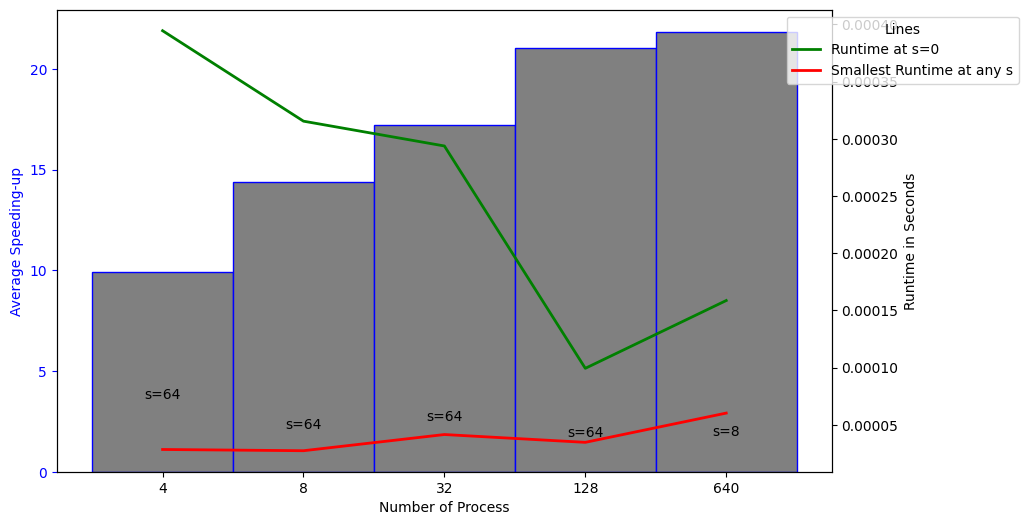

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe containing the mentioned columns
# Sample data:
# df = pd.DataFrame({
#     'blksize': [...],
#     's': [...],
#     'num_processes': [...],
#     'runtime': [...],
#     'kernel': [...],
#     'allreduce_time': [...]
# })

df = data

# Calculating the average speeding-up and smallest runtime
avg_speedup = []
runtime_s_0 = []
min_runtime_s = []
num_list = [4,8,32,128,640]

print(type(min_runtime_s))

#for num_process in df['num_process'].unique():
for num_process in num_list:
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()

    # Inserting at the beginning of the list to reverse the order
    runtime_s_0.insert(0, runtime_s_0_value)

    min_runtime = subset_df['major_time'].min()
    # min_runtime_s.insert(0, min_runtime) # Inserting here as well
    min_runtime_s.append(min_runtime)

    #speedup = runtime_s_0_value / min_runtime
    speedup = 0.000598037  / min_runtime
    avg_speedup.insert(0, speedup) # Inserting here as well




# ... (Same as above, including DataFrame and calculations)


# Calculating the 's' value corresponding to the smallest runtime
'''
s_values_min_runtime = [df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s'].iloc[0]
                        for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s)]
                        '''

# Getting unique num_processes values
unique_num_processes = num_list
#unique_num_processes = sorted(df['num_process'].unique())

# Plotting the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(range(len(unique_num_processes)), sorted(avg_speedup), color='gray', edgecolor='blue', width=1)
ax1.set_xlabel('Number of Process')
ax1.set_ylabel('Average Speeding-up')
#ax1.set_title('Bar & Line Plot of Average Speeding-up & Runtime')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
plt.xticks(range(len(unique_num_processes)), unique_num_processes) # Setting x-axis ticks to unique values

# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime in Seconds')

# Line plots
line1, = ax2.plot(range(len(unique_num_processes)), runtime_s_0[::-1], 'g-', label='Runtime at s=0', linewidth=2)
line2, = ax2.plot(range(len(unique_num_processes)), min_runtime_s[::-1], 'r-', label='Smallest Runtime at any s', linewidth=2)

# Adding s-value annotations
for i, y, s_value in zip(range(len(unique_num_processes)), min_runtime_s, s_values_min_runtime):
    plt.annotate(f's={s_value}', (i, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend
ax2.legend(handles=[line1, line2], loc='upper right', title='Lines', bbox_to_anchor=(1.25, 1))

# Saving the plot
plt.savefig('mixed_plot_with_unique_x.png')
plt.show()

# 改版（SpeedUP不固定）

<class 'list'>


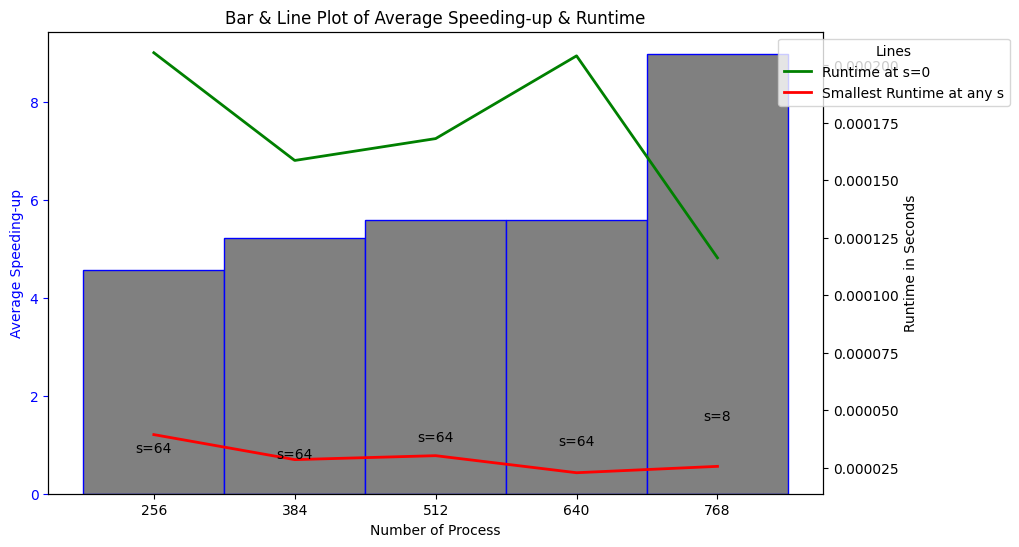

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe containing the mentioned columns
# Sample data:
# df = pd.DataFrame({
#     'blksize': [...],
#     's': [...],
#     'num_processes': [...],
#     'runtime': [...],
#     'kernel': [...],
#     'allreduce_time': [...]
# })

df = data

# Calculating the average speeding-up and smallest runtime
avg_speedup = []
runtime_s_0 = []
min_runtime_s = []
num_list = [256,384,512,640,768]

print(type(min_runtime_s))

#for num_process in df['num_process'].unique():
for num_process in num_list:
    subset_df = df[df['num_process'] == num_process]
    runtime_s_0_value = subset_df[subset_df['s'] == 0]['major_time'].mean()

    # Inserting at the beginning of the list to reverse the order
    runtime_s_0.insert(0, runtime_s_0_value)

    min_runtime = subset_df['major_time'].min()
    # min_runtime_s.insert(0, min_runtime) # Inserting here as well
    min_runtime_s.append(min_runtime)

    speedup = runtime_s_0_value / min_runtime
    #speedup = 0.000681715 / min_runtime
    avg_speedup.insert(0, speedup) # Inserting here as well




# ... (Same as above, including DataFrame and calculations)


# Calculating the 's' value corresponding to the smallest runtime
'''
s_values_min_runtime = [df[(df['num_process'] == num_process) & (df['major_time'] == min_runtime)]['s'].iloc[0]
                        for num_process, min_runtime in zip(df['num_process'].unique(), min_runtime_s)]
'''

# Getting unique num_processes values
unique_num_processes = num_list
#unique_num_processes = sorted(df['num_process'].unique())

# Plotting the bar plot
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(range(len(unique_num_processes)), sorted(avg_speedup), color='gray', edgecolor='blue', width=1)
ax1.set_xlabel('Number of Process')
ax1.set_ylabel('Average Speeding-up')
ax1.set_title('Bar & Line Plot of Average Speeding-up & Runtime')
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')
plt.xticks(range(len(unique_num_processes)), unique_num_processes) # Setting x-axis ticks to unique values

# Creating a second y-axis for the line plot
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime in Seconds')

# Line plots
line1, = ax2.plot(range(len(unique_num_processes)), runtime_s_0, 'g-', label='Runtime at s=0', linewidth=2)
line2, = ax2.plot(range(len(unique_num_processes)), min_runtime_s[::-1], 'r-', label='Smallest Runtime at any s', linewidth=2)

# Adding s-value annotations
for i, y, s_value in zip(range(len(unique_num_processes)), min_runtime_s, s_values_min_runtime):
    plt.annotate(f's={s_value}', (i, y), textcoords="offset points", xytext=(0,10), ha='center')

# Adding a legend
ax2.legend(handles=[line1, line2], loc='upper right', title='Lines', bbox_to_anchor=(1.25, 1))

# Saving the plot
plt.savefig('mixed_plot_with_unique_x.png')
plt.show()